# Data Analytics Project - Cruise Ship Reservations Analysis

This notebook implements 4 visualizations from the project requirements using Python and Pandas.

## Summary
1. **Pie Chart**: Country distribution of cruise bookers (Reservations Dashboard)
2. **Line Chart**: Average daily rate by month for Deluxe vs Regular (Reservations Dashboard)
3. **Bar Chart**: Reservations by weekday type - Weekday Only, Weekend Only, Mixed (Reservations Dashboard)
4. **3 Pie Charts**: Cancellation rates by customer type - Singles, Couples, Groups (Cancellations Dashboard)

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [80]:
# Load the reservations dataset
df = pd.read_csv('reservations.csv')

# Map country codes to full names for better readability in graphs
country_names = {
    'PRT': 'Portugal', 'GBR': 'United Kingdom', 'FRA': 'France', 'ESP': 'Spain',
    'DEU': 'Germany', 'ITA': 'Italy', 'IRL': 'Ireland', 'BEL': 'Belgium',
    'BRA': 'Brazil', 'NLD': 'Netherlands', 'USA': 'United States', 'CHE': 'Switzerland',
    'CN': 'China', 'AUT': 'Austria', 'SWE': 'Sweden', 'AGO': 'Angola'
}
# Create new column with full country names, keep original if not in mapping
df['country_full'] = df['country'].map(country_names).fillna(df['country'])

---
## Graph 1: Pie Chart - Country Distribution of Cruise Bookers
From Reservations Dashboard: Distribution of origin countries of cruise bookers

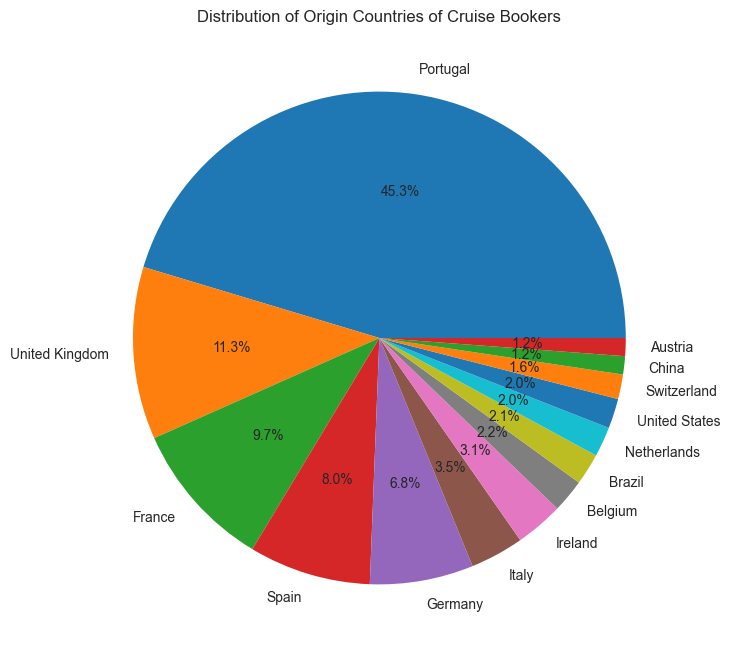

In [81]:
# Count reservations per country
country_counts = df['country_full'].value_counts()
# Filter out countries with less than 1% of total reservations
country_counts = country_counts[country_counts / country_counts.sum() >= 0.01]

plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Origin Countries of Cruise Bookers')
plt.show()

---
## Graph 2: Line Chart - Average Daily Rate by Month for Each Cruise Type
From Reservations Dashboard: X axis = 12 months, Y axis = average daily rate, 2 lines (Deluxe & Regular)

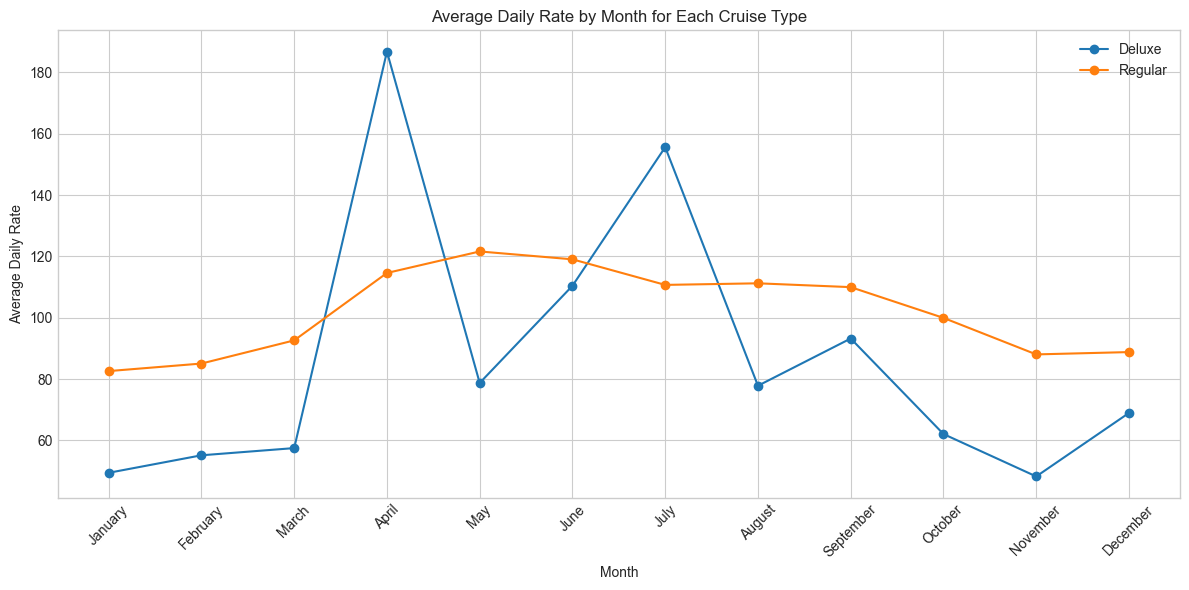

In [82]:
# Define correct month order for x-axis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and cruise type, calculate average daily rate
avg_rate = df.groupby(['M', 'cruise'])['DailyAVG'].mean().unstack().reindex(month_order)

plt.figure(figsize=(12, 6))
# Plot separate line for each cruise type
plt.plot(avg_rate.index, avg_rate['Deluxe'], marker='o', label='Deluxe')
plt.plot(avg_rate.index, avg_rate['Regular'], marker='o', label='Regular')
plt.title('Average Daily Rate by Month for Each Cruise Type')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
## Graph 3: Bar Chart - Reservations by Weekday Type
From Reservations Dashboard: Number of reservations by stay type (Weekday Only, Weekend Only, Mixed)

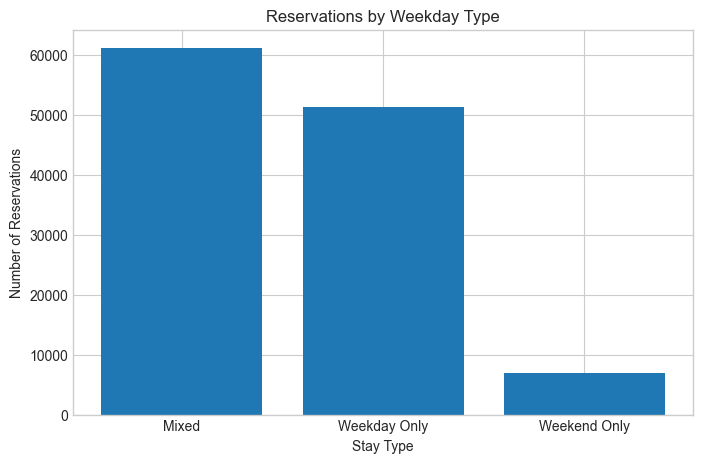

In [83]:
# Function to categorize each reservation by stay type
def get_stay_type(row):
    if row['weekendnights'] == 0 and row['weeknights'] > 0:
        return 'Weekday Only'
    elif row['weeknights'] == 0 and row['weekendnights'] > 0:
        return 'Weekend Only'
    else:
        return 'Mixed'

# Apply function to create new column
df['stay_type'] = df.apply(get_stay_type, axis=1)
# Count reservations per stay type
stay_counts = df['stay_type'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(stay_counts.index, stay_counts.values)
plt.title('Reservations by Weekday Type')
plt.xlabel('Stay Type')
plt.ylabel('Number of Reservations')
plt.show()

---
## Graph 4: Three Pie Charts - Cancellation Rates by Customer Type
From Cancellations Dashboard: 3 pie charts showing cancellation rates for Singles, Couples, and Groups

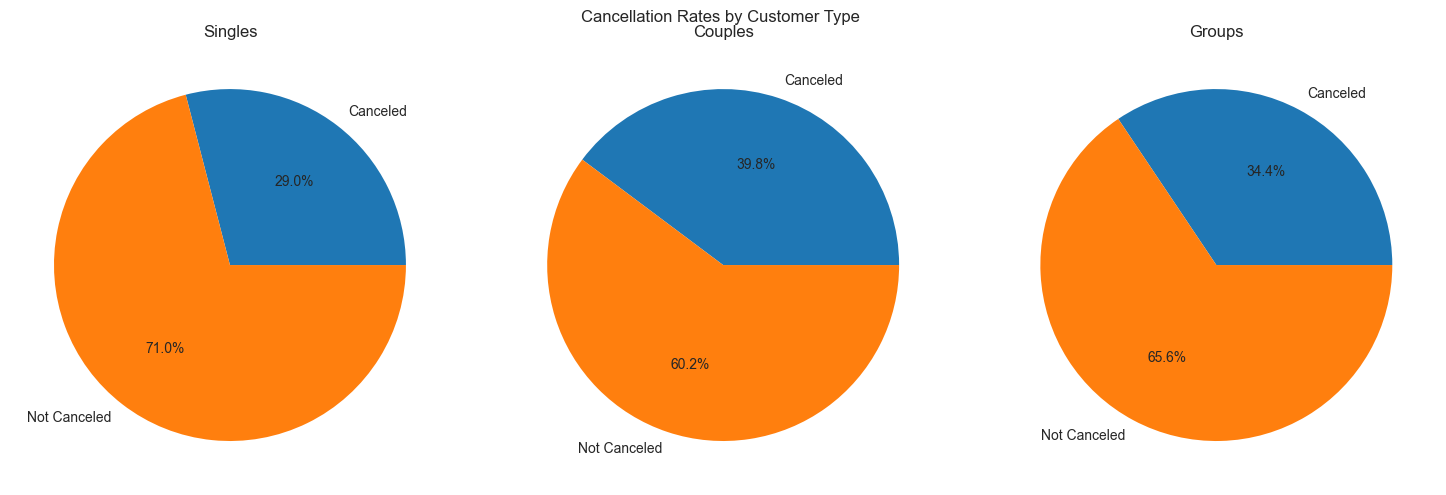

In [84]:
# Filter data by customer type
singles = df[(df['ADLT'] == 1) & (df['CHLD'] == 0) & (df['BBY'] == 0)]  # 1 adult, no kids
couples = df[(df['ADLT'] == 2) & (df['CHLD'] == 0) & (df['BBY'] == 0)]  # 2 adults, no kids
groups = df[~df.index.isin(singles.index) & ~df.index.isin(couples.index)]  # All others

# Function to calculate cancellation percentages
def get_cancel_pct(data):
    canceled = (data['cancel'] == 'yes').sum()
    return [canceled / len(data) * 100, (len(data) - canceled) / len(data) * 100]

# Create 3 pie charts side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(get_cancel_pct(singles), labels=['Canceled', 'Not Canceled'], autopct='%1.1f%%')
axs[0].set_title('Singles')

axs[1].pie(get_cancel_pct(couples), labels=['Canceled', 'Not Canceled'], autopct='%1.1f%%')
axs[1].set_title('Couples')

axs[2].pie(get_cancel_pct(groups), labels=['Canceled', 'Not Canceled'], autopct='%1.1f%%')
axs[2].set_title('Groups')

plt.suptitle('Cancellation Rates by Customer Type')
plt.tight_layout()
plt.show()

---